# Exercise 8 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import linalg as la

## 1. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [2]:
N = 1000

x_1 = np.random.normal(0,1, N)
x_2 = x_1 + np.random.normal(0,3, N)
x_3 = 2*x_1 + x_2


df = pd.DataFrame(zip(x_1, x_2, x_3))

A = np.array(df.cov())
print("A:\n", A, '\n')

l, V = la.eig(A)
# the eigenvalues
print("l:\n", l, '\n')
# the eigenvectors
print("V:\n", V.transpose(), '\n')

A:
 [[ 1.06362322  1.02886075  3.1561072 ]
 [ 1.02886075 10.22904345 12.28676496]
 [ 3.1561072  12.28676496 18.59897935]] 

l:
 [2.77696237e+01+0.j 9.56111257e-16+0.j 2.12202236e+00+0.j] 

V:
 [[-0.11786201 -0.57435387 -0.81007788]
 [-0.81649658 -0.40824829  0.40824829]
 [ 0.5651919  -0.70954279  0.42084101]] 



In [3]:
U, s, Vt = la.svd(A)

S = np.zeros((3, 3))
for i in range(min(3, 3)):
    S[i, i] = s[i]
    


print("V^T:\n", Vt, '\n')
print("S:\n", S, '\n')
SVD = np.dot(U, np.dot(S, Vt))
print("SVD:\n", SVD, '\n')

V^T:
 [[-0.11786201 -0.57435387 -0.81007788]
 [ 0.5651919  -0.70954279  0.42084101]
 [-0.81649658 -0.40824829  0.40824829]] 

S:
 [[2.77696237e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.12202236e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.27920566e-16]] 

SVD:
 [[ 1.06362322  1.02886075  3.1561072 ]
 [ 1.02886075 10.22904345 12.28676496]
 [ 3.1561072  12.28676496 18.59897935]] 



In [4]:
Lambda = np.diag(l)
print("Lambda:\n", Lambda, '\n')
print("Trace(A):\n", A.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')
print(A.trace()/Lambda.trace())
print("By selecting the component 0, we retain %.2f%% of the total variability" % (100*Lambda[0, 0]/Lambda.trace()))
print("By selecting the component 1, we retain %.2f%% of the total variability" % (100*Lambda[1, 1]/Lambda.trace()))
print("By selecting the component 2, we retain %.2f%% of the total variability" % (100*Lambda[2, 2]/Lambda.trace()))

Lambda:
 [[2.77696237e+01+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 9.56111257e-16+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 2.12202236e+00+0.j]] 

Trace(A):
 29.891646028823168 

Trace(Lambda):
 (29.891646028823164+0j) 

(1+0j)
By selecting the component 0, we retain 92.90% of the total variability
By selecting the component 1, we retain 0.00% of the total variability
By selecting the component 2, we retain 7.10% of the total variability


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


It makes sense that the first component has high variability as it only is dependent on fixed values. The second component depends on two normal compositions with different standard diviation so it makes sense that the vairability is low/zero. Also the third has low variability becouse of this.

In [5]:
Lambda1 = np.diag(l)
Lambda[1,1] = 0
print("Lambda:\n", Lambda, '\n')
print("Trace(A):\n", A.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

print("By selecting the component 0, we retain %.2f%% of the total variability" % (100*Lambda[0,0]/Lambda.trace()))

Lambda:
 [[27.76962367+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  2.12202236+0.j]] 

Trace(A):
 29.891646028823168 

Trace(Lambda):
 (29.891646028823164+0j) 

By selecting the component 0, we retain 92.90% of the total variability


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


In [6]:
df2 = pd.DataFrame(zip(x_1, x_3))
A2 = np.array(df2.cov())
l2, V2 = la.eig(A2)
Lambda2 = np.diag(l2)

print("Lambda:\n", Lambda2, '\n')
print("Trace(A):\n", A2.trace(), '\n')
print("Trace(Lambda):\n", Lambda2.trace(), '\n')

print("By selecting the component 0, we retain %.2f%% of the total variability" % (100*Lambda2[1, 1]/Lambda2.trace()))

Lambda:
 [[ 0.51286841+0.j  0.        +0.j]
 [ 0.        +0.j 19.14973416+0.j]] 

Trace(A):
 19.662602574008275 

Trace(Lambda):
 (19.66260257400828+0j) 

By selecting the component 0, we retain 97.39% of the total variability


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


In [7]:
newB = np.dot(Vt.T, df.to_numpy().T)

Text(0.5, 1.0, 'old')

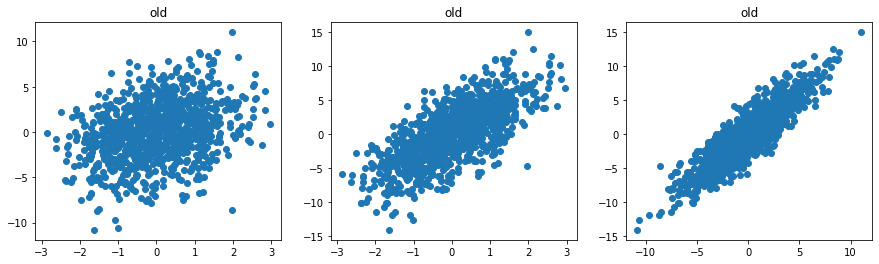

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
ax1.scatter(df[0], df[1])
ax1.set_title("old")
ax2.scatter(df[0], df[2])
ax2.set_title("old")
ax3.scatter(df[1], df[2])
ax3.set_title("old")


Text(0.5, 1.0, 'new')

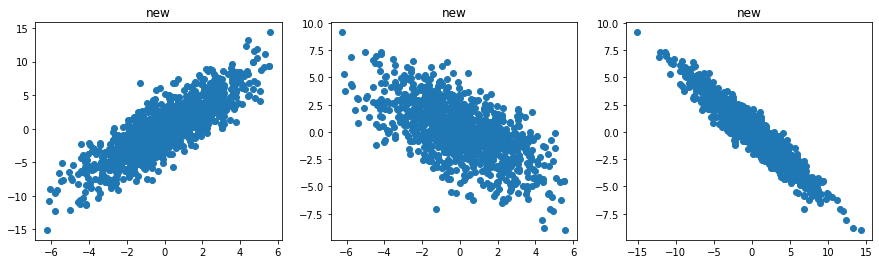

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
ax1.scatter(newB[0], newB[1])
ax1.set_title("new")
ax2.scatter(newB[0], newB[2])
ax2.set_title("new")
ax3.scatter(newB[1], newB[2])
ax3.set_title("new")



## 2. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [15]:
x_noise = 0
for i in range(0,10):
    x_noise += np.random.normal(0,0.05, N)


df_2 = pd.DataFrame(zip(x_1+x_noise, x_2+x_noise, x_3+x_noise))




,0,1,2
0,-1.335599,2.992163,0.566856
1,-0.463186,-1.624592,-1.965401
2,-0.687740,6.526112,5.080228
3,-2.486289,-1.667332,-6.913368
4,0.135260,5.787667,6.141354
...,...,...,...
995,-1.227095,-1.196681,-3.416237
996,-1.331673,0.008125,-2.379814
997,-0.798511,4.257706,2.774050
998,0.649697,4.733105,6.265149


In [16]:
A_2 = np.array(df_2.cov())
print("A:\n", A_2, '\n')

l_2, V_2 = la.eig(A_2)
# the eigenvalues
print("l:\n", l_2, '\n')
# the eigenvectors
print("V:\n", V_2.transpose(), '\n')

A:
 [[ 1.10245591  1.04288417  3.18240269]
 [ 1.04288417 10.21825761 12.28825118]
 [ 3.18240269 12.28825118 18.61273765]] 

l:
 [2.77839815e+01+0.j 1.75487845e-02+0.j 2.13192088e+00+0.j] 

V:
 [[-0.11907088 -0.57387826 -0.81023815]
 [-0.81172564 -0.41366973  0.41228489]
 [ 0.57177234 -0.70678221  0.41657568]] 



In [18]:
U_2, s_2, Vt_2 = la.svd(A_2)

S_2 = np.zeros((3, 3))
for i in range(min(3, 3)):
    S_2[i, i] = s_2[i]
    

print("V^T:\n", Vt_2, '\n')
print("S:\n", S_2, '\n')
SVD_2 = np.dot(U_2, np.dot(S_2, Vt_2))
print("SVD:\n", SVD_2, '\n')

V^T:
 [[-0.11907088 -0.57387826 -0.81023815]
 [ 0.57177234 -0.70678221  0.41657568]
 [-0.81172564 -0.41366973  0.41228489]] 

S:
 [[2.77839815e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.13192088e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.75487845e-02]] 

SVD:
 [[ 1.10245591  1.04288417  3.18240269]
 [ 1.04288417 10.21825761 12.28825118]
 [ 3.18240269 12.28825118 18.61273765]] 



Text(0.5, 1.0, 'old')

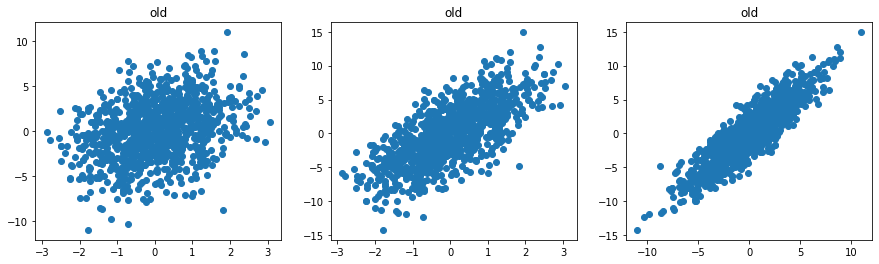

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
ax1.scatter(df_2[0], df_2[1])
ax1.set_title("old")
ax2.scatter(df_2[0], df_2[2])
ax2.set_title("old")
ax3.scatter(df_2[1], df_2[2])
ax3.set_title("old")
    

Text(0.5, 1.0, 'new')

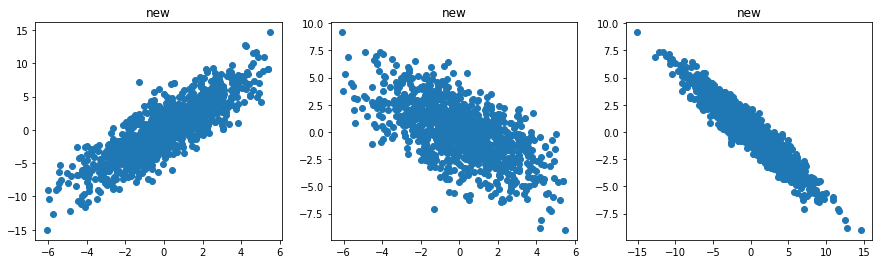

In [21]:
newB_2 = np.dot(Vt_2.T, df_2.to_numpy().T)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
ax1.scatter(newB_2[0], newB_2[1])
ax1.set_title("new")
ax2.scatter(newB_2[0], newB_2[2])
ax2.set_title("new")
ax3.scatter(newB_2[1], newB_2[2])
ax3.set_title("new")